<a href="https://colab.research.google.com/github/MounishaChalasani/MounishaChalasani-INFO5731_Assignment_One_fall2022/blob/main/In_class_exercise_04_11032022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 11/03/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [18]:
# Write your code here

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.corpus import stopwords
from gensim.models.coherencemodel import CoherenceModel

In [19]:
nltk.download('stopwords')
token = RegexpTokenizer(r'\w+')

english_stopwords = stopwords.words('english')

PS = PorterStemmer()
    
a = "My facvourite hobby is to play badminton.I like watching cricket."
b = "My mother is my biggest support system and never let me down in any situation."
c = "I wanted to become data scientist."
d = "Professionals of health department, say that maintaining healthy lifestyle is good for our health."

text = [a, b, c, d]
text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['My facvourite hobby is to play badminton.I like watching cricket.',
 'My mother is my biggest support system and never let me down in any situation.',
 'I wanted to become data scientist.',
 'Professionals of health department, say that maintaining healthy lifestyle is good for our health.']

In [20]:
def coherence_score(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    
    values = []
    list_values = []
    for i in range(start, stop, step):
        lsa_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=2, id2word = dictionary) 
        list_values.append(lsa_model)
        coherencemodel = CoherenceModel(model=lsa_model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        values.append(coherencemodel.get_coherence())
    return list_values, values

texts = []

for i in text:
    
    raw = i.lower()
    tokens = token.tokenize(raw)
    stop_tokens = [i for i in tokens if not i in english_stopwords]
    stem_tokens = [PS.stem(i) for i in stop_tokens]
    texts.append(stem_tokens)

dict = corpora.Dictionary(texts)
    
corpus = [dict.doc2bow(text) for text in texts]
list_values, values = coherence_score(dict, corpus, texts, 12,2,2)

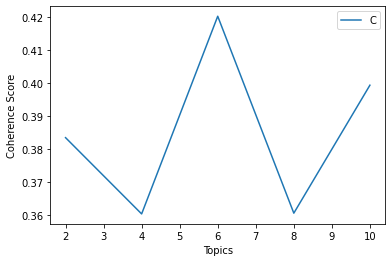

[0.3834269224503031, 0.36026776917357467, 0.4202890221090223, 0.36049824061932123, 0.39935202011453375]
0.4202890221090223
6
[(0, '0.038*"data" + 0.038*"scientist" + 0.038*"becom"'), (1, '0.103*"cricket" + 0.103*"facvourit" + 0.103*"play"'), (2, '0.103*"never" + 0.103*"support" + 0.103*"biggest"'), (3, '0.162*"health" + 0.087*"healthi" + 0.087*"say"'), (4, '0.038*"data" + 0.038*"scientist" + 0.038*"becom"'), (5, '0.140*"want" + 0.140*"scientist" + 0.140*"becom"')]


In [22]:
import matplotlib.pyplot as plt
limit=12; start=2; step=2;
graph = range(start, limit, step)
plt.plot(graph, values)
plt.xlabel("Topics")
plt.ylabel("Coherence Score")
plt.legend(("Coherence Values"), loc='best')
plt.show()

x=max(values)
y=values.index(x)
y= (y+1)*2
print(values)
print(x)
print(y)

lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=y, id2word = dict, passes=20)

print(lda_model.print_topics(num_topics=y, num_words=3))

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [23]:
# Write your code here

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.corpus import stopwords
from gensim.models.coherencemodel import CoherenceModel

In [24]:
nltk.download('stopwords')
token = RegexpTokenizer(r'\w+')

english_stopwords = stopwords.words('english')

PS = PorterStemmer()
    
a = "My facvourite hobby is to play badminton.I like watching cricket."
b = "My mother is my biggest support system and never let me down in any situation."
c = "I wanted to become data scientist."
d = "Professionals of health department, say that maintaining healthy lifestyle is good for our health."

text = [a, b, c, d]
text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['My facvourite hobby is to play badminton.I like watching cricket.',
 'My mother is my biggest support system and never let me down in any situation.',
 'I wanted to become data scientist.',
 'Professionals of health department, say that maintaining healthy lifestyle is good for our health.']

In [28]:
def coherence_score(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    
    values = []
    list_values = []
    for i in range(start, stop, step):
        lsa_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=2, id2word = dictionary) 
        list_values.append(lsa_model)
        coherencemodel = CoherenceModel(model=lsa_model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        values.append(coherencemodel.get_coherence())
    return list_values, values

texts = []

for i in text:
    
    raw = i.lower()
    tokens = token.tokenize(raw)
    stop_tokens = [i for i in tokens if not i in english_stopwords]
    stem_tokens = [PS.stem(i) for i in stop_tokens]
    texts.append(stem_tokens)

dict = corpora.Dictionary(texts)
    
corpus = [dict.doc2bow(text) for text in texts]
list_values, values = coherence_score(dict, corpus, texts, 12,2,2)

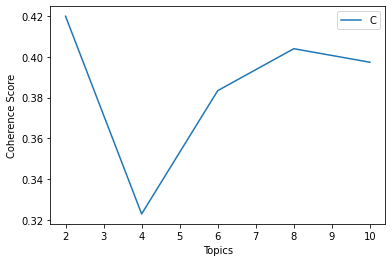

[0.41991925816945913, 0.3229557620903361, 0.3834269224503031, 0.40399416050522846, 0.39735787781983145]
0.41991925816945913
2
[(0, '-0.603*"health" + -0.302*"lifestyl" + -0.302*"good"'), (1, '0.378*"let" + 0.378*"mother" + 0.378*"system"')]


In [29]:
import matplotlib.pyplot as plt
limit=12; start=2; step=2;
graph = range(start, limit, step)
plt.plot(graph, values)
plt.xlabel("Topics")
plt.ylabel("Coherence Score")
plt.legend(("Coherence Values"), loc='best')
plt.show()

x=max(values)
y=values.index(x)
y= (y+1)*2
print(values)
print(x)
print(y)

lsa_model = gensim.models.lsimodel.LsiModel(corpus, num_topics=y, id2word = dict)
print(lsa_model.print_topics(num_topics=y, num_words=3))

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [30]:
# Write your code here

#Need to import the packages required
import nltk; nltk.download('stopwords')
!python3 -m spacy download en

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2022-11-08 06:47:11.741853: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 1.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
# Installing gensim and pyLDAvis modules
!pip install pyLDAvis==2.1.2
!pip install gensim==3.8.3
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.1 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=55defda33be8b49fb3b516bf822a83d0d278597d197d81ccbfa378eaecbca531
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 4.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [35]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.extend(['from', 'subject', 're','and'])
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [36]:
# Write your code here

import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [37]:
def data_loading(path,file_name):
    list = []
    title=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            list.append(text)
    print("Total Documents:",len(list))
    title.append( text[0:min(len(text),100)] )
    return list,title

In [39]:
def data_processing(doc_set):
    token = RegexpTokenizer(r'\w+')
    english_stopwords = set(stopwords.words('english'))
    PS = PorterStemmer()
    text = []
    for i in doc_set:
        raw = i.lower()
        tokens = token.tokenize(raw)
        stop_tokens = [i for i in tokens if not i in english_stopwords]
        stem_tokens = [PS.stem(i) for i in stop_tokens]
        text.append(stem_tokens)
    return text

In [40]:
def corpus(doc_clean):
    dict = corpora.Dictionary(doc_clean)
    doc_matrix = [dict.doc2bow(doc) for doc in doc_clean]
    return dict,doc_matrix

In [41]:
def lsa_model(doc_clean,number_of_topics,words):
    dict,doc_matrix=corpus(doc_clean)
    lsa_model = LsiModel(doc_matrix, num_topics=number_of_topics, id2word = dict)
    print(lsa_model.print_topics(num_topics=number_of_topics, num_words=words))
    return lsa_model

In [42]:
def coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    values = []
    list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        list.append(model)
        coherence_model = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        values.append(coherence_model.get_coherence())
    return list, values

In [44]:
def graph(doc_clean,start, stop, step):
    dict,doc_matrix=corpus(doc_clean)
    list, values = coherence_values(dict, doc_matrix,doc_clean,stop, start, step)
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Topics")
    plt.ylabel("Coherence_Score")
    plt.legend(("Coherence_Values"), loc='best')
    plt.show()

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [45]:
# Write your answer here (no code needed for this question)
""" 
From the models' implementation as described previously, I believe the LDA model provides greater accuracy than LSA design due to the LSA model's inability to accurately conveying a word's several meanings. 
Hence, the LDA model's results are more logical than LSA model's.
"""

" \nFrom the models' implementation as described previously, I believe the LDA model provides greater accuracy than LSA design due to the LSA model's inability to accurately conveying a word's several meanings. \nHence, the LDA model's results are more logical than LSA model's.\n"